In [1]:
# pip install opencv-python # to use the cv2

In [2]:
import numpy as np
import gym
import gym_sokoban
import matplotlib.pyplot as plt
from custom_sokoban_env import my_sokoban_env
import sokoban_tabular
import time
import sys
import random 
import itertools
import cv2
from dqn import train_dqn

# Check System Requirements

In [3]:
# pip install gym==0.21.0

In [4]:
print(gym.__version__)

0.21.0


In [5]:
print(sys.version)

3.9.17 (main, Jul  5 2023, 21:22:06) [MSC v.1916 64 bit (AMD64)]


# Define the environment and number of boxes

In [6]:
# # Create the Sokoban environment from sokoban versions.
# env_name = 'Sokoban-v2'
# game_env = gym.make(env_name)

In [7]:
# Create the Sokoban environment custom
# game_env = my_sokoban_env(dim_room=(10, 10), num_boxes=3)

In [8]:
# Function to convert state to a tuple
def state_to_tuple(state):
    return tuple(state.reshape(-1))

# Save the original state of the environment
# initial_state = game_env.reset()
# initial_state_tuple = state_to_tuple(initial_state)
# game_env.render(mode='human')

In [9]:
# Action lookup
# ACTION_LOOKUP = env.unwrapped.get_action_lookup()
# Convert state to tuple representation (for tabular SARSA)
def state_to_tuple(state):
    return tuple(state.ravel())

# Save One Initial State for Consistancy

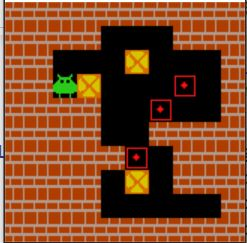

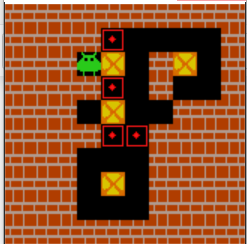

In [10]:
# # We need to save the exact one we see below so comment this when selected the desired env topology
# initial_agent_position = game_env.player_position
# initial_box_mapping = game_env.box_mapping
# initial_room_fixed = game_env.room_fixed
# initial_room_state = game_env.room_state

In [11]:
# 3 Box environment
initial_room_state = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                               [0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
                               [0, 0, 1, 1, 1, 4, 1, 1, 1, 0],
                               [0, 0, 5, 4, 1, 1, 1, 2, 1, 0],
                               [0, 0, 0, 0, 1, 1, 2, 1, 1, 0],
                               [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
                               [0, 0, 0, 0, 0, 2, 1, 0, 0, 0],
                               [0, 0, 0, 0, 1, 4, 1, 0, 0, 0],
                               [0, 0, 0, 0, 1, 1, 1, 1, 1, 0],
                               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

initial_room_fixed = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                               [0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
                               [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
                               [0, 0, 1, 1, 1, 1, 1, 2, 1, 0],
                               [0, 0, 0, 0, 1, 1, 2, 1, 1, 0],
                               [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
                               [0, 0, 0, 0, 0, 2, 1, 0, 0, 0],
                               [0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
                               [0, 0, 0, 0, 1, 1, 1, 1, 1, 0],
                               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

initial_box_mapping = np.array({(3, 7): (7, 5), (4, 6): (3, 3), (6, 5): (2, 5)})

initial_agent_position = np.array([3,2])

In [12]:
# # 4 Box environment
# initial_room_state = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#        [0, 0, 0, 0, 2, 1, 1, 1, 1, 0],
#        [0, 0, 0, 5, 4, 1, 0, 4, 1, 0],
#        [0, 0, 0, 0, 2, 1, 0, 1, 1, 0],
#        [0, 0, 0, 1, 4, 1, 1, 0, 0, 0],
#        [0, 0, 0, 0, 2, 2, 0, 0, 0, 0],
#        [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
#        [0, 0, 0, 1, 4, 1, 0, 0, 0, 0],
#        [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
#        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

# initial_room_fixed = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#        [0, 0, 0, 0, 2, 1, 1, 1, 1, 0],
#        [0, 0, 0, 1, 1, 1, 0, 1, 1, 0],
#        [0, 0, 0, 0, 2, 1, 0, 1, 1, 0],
#        [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
#        [0, 0, 0, 0, 2, 2, 0, 0, 0, 0],
#        [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
#        [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
#        [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
#        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

# initial_box_mapping = np.array({(1, 4): (2, 7), (3, 4): (4, 4), (5, 4): (7, 4), (5, 5): (2, 4)})

# initial_agent_position = np.array([2, 3])

In [13]:
game_env = my_sokoban_env(initial_agent_position=initial_agent_position,
                        initial_box_mapping=initial_box_mapping,
                        initial_room_fixed=initial_room_fixed,
                        initial_room_state=initial_room_state)

In [14]:
# game_env.reset()
# game_env.render(mode='human')

In [15]:
# pip install stable-baselines3 gym numpy torch torchvision

In [16]:
# pip install shimmy

In [17]:
# pip install tqdm

In [18]:
# pip install mcts

In [19]:
import gym
import numpy as np
import torch
import torch.nn as nn
from stable_baselines3 import DQN
from stable_baselines3.common.vec_env import DummyVecEnv
from tqdm import tqdm

from stable_baselines3.common.atari_wrappers import AtariWrapper
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.dqn import CnnPolicy, MlpPolicy

In [30]:
def train_sokoban():
    # Create the Sokoban environment
    env = my_sokoban_env(initial_agent_position=initial_agent_position,
                        initial_box_mapping=initial_box_mapping,
                        initial_room_fixed=initial_room_fixed,
                        initial_room_state=initial_room_state)

    # Wrap the environment with DummyVecEnv to support training with DQN
    env = DummyVecEnv([lambda: env])

    # Define and train the DQN model
    model = DQN("MlpPolicy", env, buffer_size=50000,learning_starts=5000, verbose=1)

    # Use the modified second_reset function for resetting the environment
    model.set_env(env)
    model.learn(total_timesteps=20000)

    # Save the trained model
    model.save("sokoban_dqn_model_ml")



In [31]:
if __name__ == "__main__":
    train_sokoban()

TypeError: __init__() got an unexpected keyword argument 'support_multi_env'

**rollout/exploration_rate:** This is the current rate of exploration used by the agent. In the beginning, the agent needs to explore the environment to learn as much as possible. As the training progresses and the agent gets more familiar with the environment, it relies less on exploration and more on the knowledge it has already gained. The exploration rate usually starts high and decreases over time. The actual value (0.088) can be interpreted as the chance (8.8%) that the agent will take a random action instead of using the policy it has learned.

**ime/episodes:** This is the number of episodes that have been completed so far during training. An episode is one sequence of states, actions and rewards, which ends with a terminal state (e.g., the game is over). In this case, 8 episodes have been completed.

**time/fps:** This stands for frames per second, indicating how many steps are being processed per second in the environment. High fps leads to faster training. Here, it shows that your model is processing 90 steps per second.

**time/time_elapsed:** This is the total time (in seconds) that has elapsed since the training started. In this case, it's been 10 seconds.

**time/total_timesteps:** This is the total number of timesteps that have been processed so far. A timestep is one step in the environment, and it's not necessarily equivalent to a real-time second. Here, your model has processed a total of 960 timesteps since the beginning of training.

**train/learning_rate:** This is the learning rate used by the optimizer during the training of the DQN. The learning rate dictates how much the model parameters are updated in response to the observed error in each training step.

**train/loss:** This metric represents the value of the loss function, which the algorithm is trying to minimize. It's a measure of the difference between the model's predictions and the actual data. Lower values generally indicate better performance, although overfitting can occur if the loss becomes too low.

**train/n_updates:** This is the number of times the model has been updated during the training process. In the context of DQN, this would be the number of optimization steps taken.

In [ ]:
def test_sokoban(model, num_episodes=100):
    # Create the Sokoban environment
    env = my_sokoban_env(initial_agent_position=initial_agent_position,
                        initial_box_mapping=initial_box_mapping,
                        initial_room_fixed=initial_room_fixed,
                        initial_room_state=initial_room_state)

    for episode in range(num_episodes):
        obs = env.reset()
        done = False
        total_reward = 0

        while not done:
            # the model requires input of shape (num_parallel_envs, obs_dim)
            # so we expand the first dimension
            action, _ = model.predict(np.expand_dims(obs, axis=0))
            obs, reward, done, info = env.step(action[0])
            total_reward += reward
            
            
        print(f"Episode {episode + 1}: {total_reward}")
        
        env.render(mode='human')

if __name__ == "__main__":
    model = DQN.load("sokoban_dqn_model_ml")
    test_sokoban(model)

# Implement PPO

In [46]:
pip uninstall torch

^C
Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [41]:
from stable_baselines3 import PPO
# from stable_baselines3.common.envs import DummyVecEnv

def train_sokoban():
    # Create the Sokoban environment
    env = my_sokoban_env(initial_agent_position=initial_agent_position,
                        initial_box_mapping=initial_box_mapping,
                        initial_room_fixed=initial_room_fixed,
                        initial_room_state=initial_room_state)

    # Wrap the environment with DummyVecEnv to support training with PPO
    env = DummyVecEnv([lambda: env])

    # Define and train the PPO model
    model = PPO("MlpPolicy", env, n_steps=128, batch_size=128, verbose=1)

    model.learn(total_timesteps=20000)

    # Save the trained model
    model.save("sokoban_ppo_model")
    
if __name__ == "__main__":
    train_sokoban()

Using cpu device
Wrapping the env in a VecTransposeImage.


RuntimeError: Calling torch.geqrf on a CPU tensor requires compiling PyTorch with LAPACK. Please use PyTorch built with LAPACK support.

In [38]:
def test_sokoban():
    # Load the trained model
#     model = PPO.load("sokoban_ppo_model")

    # Create the Sokoban environment
    env = my_sokoban_env(initial_agent_position=initial_agent_position,
                        initial_box_mapping=initial_box_mapping,
                        initial_room_fixed=initial_room_fixed,
                        initial_room_state=initial_room_state)

    # Wrap the environment with DummyVecEnv to support testing with PPO
    env = DummyVecEnv([lambda: env])

    obs = env.reset()

    for _ in range(1000):
        action, _states = model.predict(obs)
        obs, rewards, dones, info = env.step(action)
        env.render()

if __name__ == "__main__":
    model = PPO.load("sokoban_ppo_model")
    test_sokoban(model)


FileNotFoundError: [Errno 2] No such file or directory: 'sokoban_ppo_model.zip'

# MCTS

In [ ]:
import numpy as np
import gym
import gym_sokoban
import matplotlib.pyplot as plt
from custom_sokoban_env import my_sokoban_env
import sokoban_tabular
import time
import sys
import random 
import itertools
import cv2
from dqn import train_dqn

In [31]:
import numpy as np

class Node:
    def __init__(self, state, env):
        self.state = state
        self.is_terminal = env._check_if_done()  # use your own termination check function
        self.is_fully_expanded = self.is_terminal
        self.children = {}
        self.parent = None  # parent node
        self.num_visits = 0
        self.total_reward = 0  # sum of rewards
        self.env = env  # store the environment

#     def expand(self):
#         for action in self.env.get_valid_actions():  # get valid actions for the current state
#             if action not in self.children:
#                 next_state, reward, done, info = self.env.step(action)  # take the action
#                 child_node = Node(next_state, self.env)  # create a new node with the new state and the environment
#                 child_node.is_terminal = done
#                 child_node.parent = self  # set the parent of the new node
#                 self.children[action] = (child_node, reward)
                
    def expand(self):
        for action in self.env.get_valid_actions():  # get valid actions for the current state
            if action not in self.children:
                next_state, reward, done, info = self.env.step(action)  # take the action
                child_node = Node(next_state, self.env)  # create a new node with the new state and the environment
                child_node.is_terminal = done
                child_node.parent = self  # set the parent of the new node
                self.children[action] = (child_node, reward)
                
    def best_child(self, c_param=1.0):
        choices_weights = []
        for child_node, _ in self.children.values():
            if child_node.num_visits == 0:
                choices_weights.append(float("inf"))  # prioritize exploration for unvisited nodes
            else:
                choices_weights.append((child_node.total_reward / child_node.num_visits) + 
                                       c_param * np.sqrt((2 * np.log(self.num_visits) / child_node.num_visits)))
        best_action = list(self.children.keys())[np.argmax(choices_weights)]
        return self.children[best_action][0]  # Return the child node, not the action



    def rollout(self):
        current_rollout_state = self.state
        while not self.env.is_done(current_rollout_state):  # use your own termination check function
            possible_moves = self.env.get_valid_actions(current_rollout_state)
            action = self.rollout_policy(possible_moves)
            next_state, reward, done, info = self.env.step(action)
            current_rollout_state = next_state
        return self.env.get_reward(current_rollout_state)  # return reward of terminal state

    @staticmethod
    def rollout_policy(possible_moves):
        return possible_moves[np.random.randint(len(possible_moves))]

def mcts(env, iterations):
    root = Node(env.reset(), env)
    root.is_terminal = env._check_if_done()
    print("Initial root node terminal state:", root.is_terminal)  # Debug statement
    for i in range(iterations):
        print("Iteration:", i+1)  # Debug statement
        node = root
        while not node.is_terminal:
#             print("Node terminal state:", node.is_terminal)  # Debug statement
            if node.is_fully_expanded:
#                 print("Node is fully expanded, getting best child...")  # Debug statement
                node = node.best_child()
            else:
#                 print("Node is not fully expanded, expanding...")  # Debug statement
                node.expand()
                node.is_fully_expanded = True
        reward = node.rollout()
        print("Rollout reward:", reward)  # Debug statement
        while node is not None:
            node.num_visits += 1
            node.total_reward += reward
            node = node.parent
    return root

# You can then use the tree like this:

initial_state = env.reset()  # Or however you define your initial state

# Create a MCTS instance with the game and initial state
my_mcts = mcts(env, 1000)

# Get the best action according to MCTS
best_action = my_mcts.best_child().state


Initial root node terminal state: False
Iteration: 1


KeyboardInterrupt: 